In [4]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
idx = pd.IndexSlice
sns.set()

In [5]:
# Importing park data

park_data = pd.read_csv('../datasets/Annual Summary Report-All Data.csv', skiprows=2, skip_footer=115)
park_data = park_data.set_index(['ParkName', 'Year'])
park_data = park_data.fillna(0)

for i in park_data.index:
    row = park_data.loc[i]
    for x in range(len(row)):
        item = row[x]
        if type(item) == str:
            item = item.replace(",","")
            row[x] = int(item)
            #print('working...')


#Getting rid of excess columns            
columns = ['RecreationVisitors', 'NonRecreationVisitors', 'RecreationHours',
       'NonRecreationHours', 'ConcessionerLodging', 'ConcessionerCamping',
       'TentCampers', 'RVCampers', 'Backcountry',
       'NonRecreationOvernightStays', 'MiscellaneousOvernightStays']

park_data = park_data[columns]

# casting to type int for all data points
for i in columns:
    park_data[i] = (park_data[i].astype(int))

/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'skip_footer' argument has been deprecated and will be removed in a future version. Please use the 'skipfooter' argument instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
park_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20883 entries, (Abraham Lincoln Birthplace NHP, 1934) to (Zion NP, 2016)
Data columns (total 11 columns):
RecreationVisitors             20883 non-null int64
NonRecreationVisitors          20883 non-null int64
RecreationHours                20883 non-null int64
NonRecreationHours             20883 non-null int64
ConcessionerLodging            20883 non-null int64
ConcessionerCamping            20883 non-null int64
TentCampers                    20883 non-null int64
RVCampers                      20883 non-null int64
Backcountry                    20883 non-null int64
NonRecreationOvernightStays    20883 non-null int64
MiscellaneousOvernightStays    20883 non-null int64
dtypes: int64(11)
memory usage: 2.5+ MB


In [7]:
# Pull out national parks and year (ie: 2017?)
# Pull out specific park?
# Lets look at tent campers in Yosemite since 1980

In [8]:
# tent campers in yosemite
# Casting TentCampers to int

yosemite_campers = park_data.loc['Yosemite NP'][['TentCampers']][park_data.loc['Yosemite NP']['TentCampers'] > 300000]
yosemite_campers.TentCampers = yosemite_campers.TentCampers.astype(int)

In [9]:
# Creating others for future use
yellowstone_campers = park_data.loc['Yellowstone NP'][['TentCampers']][park_data.loc['Yellowstone NP']['TentCampers'] > 100000]
yellowstone_campers.TentCampers = yellowstone_campers.TentCampers.astype(int)

acadia_campers = park_data.loc['Acadia NP'][['TentCampers']][park_data.loc['Acadia NP']['TentCampers'] > 100000]
acadia_campers.TentCampers = acadia_campers.TentCampers.astype(int)

In [10]:
yosemite_campers.head()

,TentCampers
Year,
1980,625208
1981,737591
1982,665191
1983,571137
1984,747145


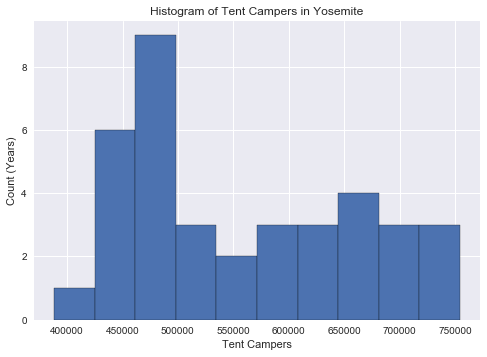

In [11]:
# Use _ as temp variable
_ = plt.hist(yosemite_campers.TentCampers, edgecolor='black')

# Label Axis
plt.xlabel('Tent Campers')
plt.ylabel('Count (Years)')
plt.title('Histogram of Tent Campers in Yosemite')
plt.show()

In [12]:
# Use square root of datapoints as bin #s
n_len = len(yosemite_campers.TentCampers)
n_bins = np.sqrt(n_len)
n_bins = int(n_bins)

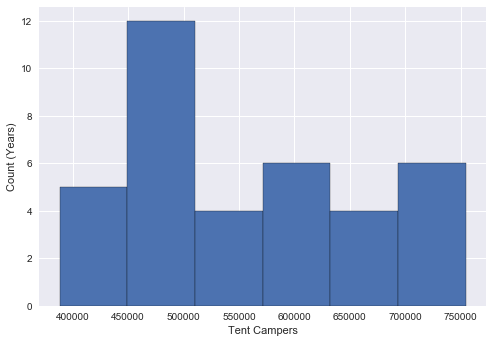

In [13]:
_ = plt.hist(yosemite_campers.TentCampers, bins=n_bins, edgecolor='black')
_ = plt.xlabel('Tent Campers')
_ = plt.ylabel('Count (Years)')
plt.show()

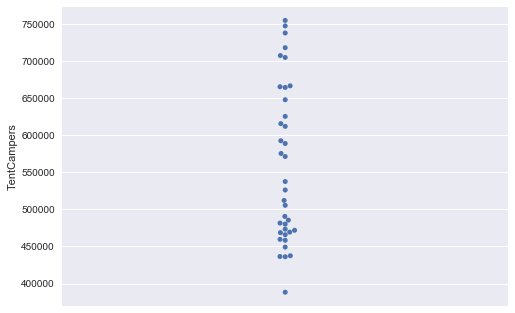

In [14]:
# Swarm plots to remove bin bias
plt.clf()

sns.swarmplot(y='TentCampers', data=yosemite_campers.reset_index())
plt.show()

/Users/joelelster/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


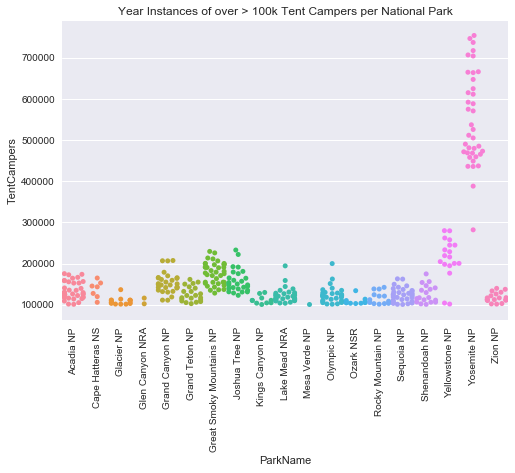

In [15]:
# Show boxplots as well

# Lets make a few more tent camping graphs
plt.clf()

#Creating temporary dataframe and casting TentCampers to type int
_ = park_data[(park_data.TentCampers > 100000)]

_.TentCampers = _.TentCampers.astype(int)

#Creating the Swarm Plot
sns.swarmplot(x='ParkName', y='TentCampers', data=_.reset_index())

#Labelling Axis
plt.xticks(rotation='90')
plt.title('Year Instances of over > 100k Tent Campers per National Park')
plt.show()

/Users/joelelster/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


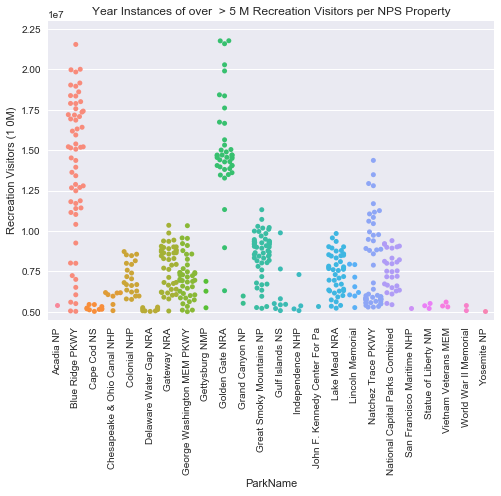

In [16]:
# Lets make a few more tent camping graphs
plt.clf()

#Creating temporary dataframe and casting TentCampers to type int
_ = park_data[(park_data.RecreationVisitors > 5000000)]

_.RecreationVisitors = _.RecreationVisitors.astype(int)

#Creating the Swarm Plot
sns.swarmplot(x='ParkName', y='RecreationVisitors', data=_.reset_index())

#Labelling Axis
plt.xticks(rotation='90')
plt.ylabel('Recreation Visitors (1 0M)')
plt.ylim(4500000,23000000)
plt.title('Year Instances of over  > 5 M Recreation Visitors per NPS Property')
plt.show()

/Users/joelelster/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


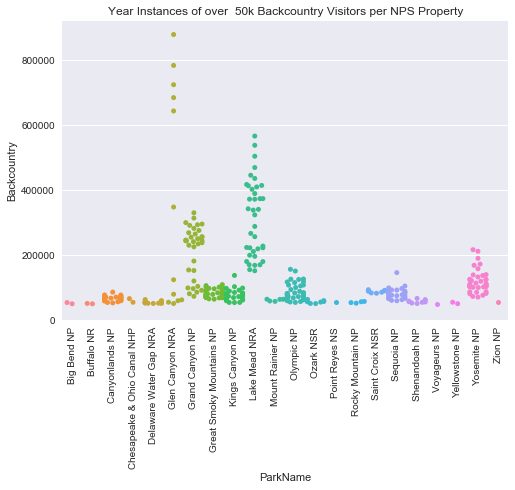

In [17]:
# Lets make a few more tent camping graphs
plt.clf()

#Creating temporary dataframe and casting TentCampers to type int
_ = park_data[(park_data.Backcountry > 50000)]

_.Backcountry = _.Backcountry.astype(int)

#Creating the Swarm Plot
sns.swarmplot(x='ParkName', y='Backcountry', data=_.reset_index())

#Labelling Axis
plt.xticks(rotation='90')
plt.title('Year Instances of over  50k Backcountry Visitors per NPS Property')
plt.show()

In [18]:
# ECDF
# Empricial Cumulative Distribution Function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)
    
    # X val is sorted values
    x = np.sort(data)
    
    # y val: np.arange creates evenly spaced array
    y = np.arange(1, 1+n) / n
    
    return x,y

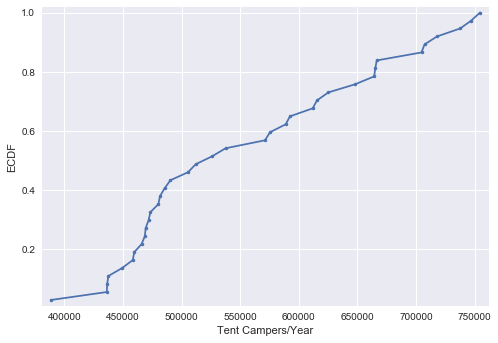

In [19]:
# Plotting the ECDF

x_vers, y_vers = ecdf(yosemite_campers.TentCampers)

plt.plot(x_vers, y_vers, marker = '.')
plt.margins(0.02) # creates a buffer margin
plt.ylabel('ECDF')
plt.xlabel('Tent Campers/Year')
plt.show()

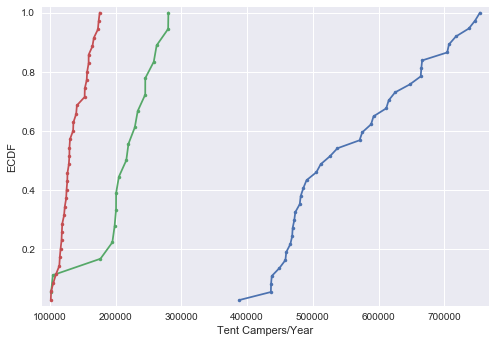

In [20]:
# Plotting multiple ECDFs

x_yotent, y_yotent = ecdf(yosemite_campers.TentCampers)
x_yetent, y_yetent = ecdf(yellowstone_campers.TentCampers)
x_actent, y_actent = ecdf(acadia_campers.TentCampers)


plt.plot(x_yotent, y_yotent, marker = '.')
plt.plot(x_yetent, y_yetent, marker = '.')
plt.plot(x_actent, y_actent, marker = '.')

plt.margins(0.02) # creates a buffer margin
plt.ylabel('ECDF')
plt.xlabel('Tent Campers/Year')
plt.show()

In [21]:
# Grab means and medians
print('mean:', np.mean(yosemite_campers.TentCampers))
print('median:',np.median(yosemite_campers.TentCampers))

mean: 557424.972972973
median: 526026.0


In [22]:
# Percentiles
np.percentile(yosemite_campers.TentCampers, [25,50,75])

array([ 469256.,  526026.,  647698.])

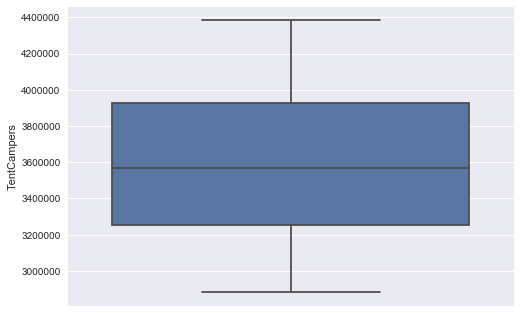

In [23]:
# Boxplots
sns.boxplot(y='TentCampers',data=park_data[park_data.TentCampers>10].groupby('Year').sum().reset_index())
plt.show()

In [24]:
# Advanced ECDF graphing
# putting different markers in for percentiles

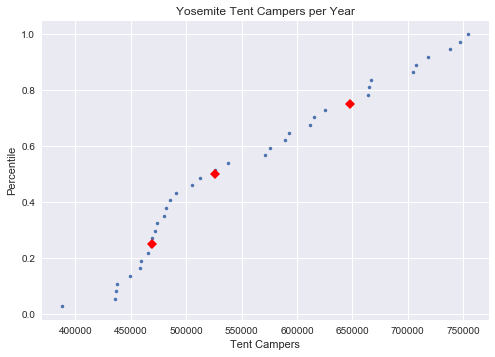

In [25]:
# ECDF of yosemite tent campers

_ = plt.plot(x_yotent, y_yotent,".")
_ = plt.title('Yosemite Tent Campers per Year')
_ = plt.xlabel('Tent Campers')
_ = plt.ylabel('Percentile')

# Creating Red Triangles for percentiles
# creating a list of the percentiles (25,50,75)

percentiles = [25,50,75]

# Finding the x_coord for each percentile using np.percentile
x_percentile = np.percentile(yosemite_campers, percentiles)

# need to divide/100 on the percentile to keep the scale proper
plt.plot(x_percentile, [percent/100 for percent in percentiles], "D", color='red') 

plt.show()

In [26]:
# Writing a function to create ECDFs 

def ecdf_graph(park,minimum = 1000,column = 'TentCampers', ecdf_marker = '.',
               ecdf_color = 'blue',percentiles = [25,50,75],perc_marker = 'D', perc_color = 'red', normal=False):
    '''take data from parks_data and return an ECDF of distribution'''
    # Creating series based of park and column
    df = park_data.loc[park]
    df = df[df[column] > minimum]
    df = df[column]
    
    # Create x_vers, y_vers from df
    x_vars, y_vars = ecdf(df)
    _ = plt.plot(x_vars, y_vars,ecdf_marker, color = ecdf_color)
    
    # Add a normal curve cdf
    if normal == True:
        x_normal, y_normal = ecdf(np.random.normal(loc=df.mean(), scale=df.std(), size=10000))
        _ = plt.plot(x_normal, y_normal, color = 'orange', alpha=0.5)
        _ = plt.legend(['Data','Normal Distribution'])

    # Percentiles
    
    # Defining percentiles to be marked
    x_percentile = np.percentile(df,percentiles)
    y_percentile = [percent/100 for percent in percentiles]
    
    # Plotting the percentiles
    plt.plot(x_percentile, y_percentile,perc_marker, color = perc_color)
    for i in range(len(percentiles)):
        x_coord = x_percentile[i]
        y_coord = y_percentile[i]
        text = percentiles[i]
        plt.annotate(s="{}th Percentile".format(text), xy = (x_coord,y_coord), xytext = (x_coord + x_coord*0.005, y_coord - 0.05))
    
    # Adding the labels and legend
    _ = plt.xlabel(column)
    _ = plt.ylabel('Percentile')
    _ = plt.title("ECDF of Yearly {0} {1} (minimum {2} {1})".format(park,column, minimum))

    # Showing the plot
    plt.show()

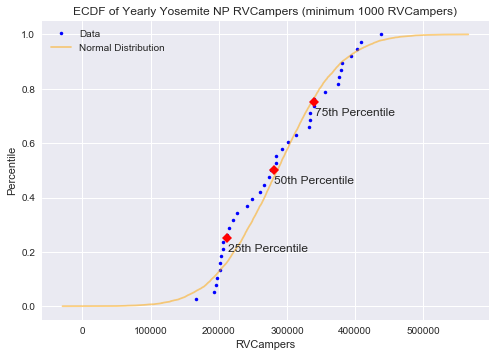

In [27]:
# Example
ecdf_graph('Yosemite NP', column='RVCampers', normal=True, minimum=1000 )

In [28]:
park_data.columns

Index(['RecreationVisitors', 'NonRecreationVisitors', 'RecreationHours',
       'NonRecreationHours', 'ConcessionerLodging', 'ConcessionerCamping',
       'TentCampers', 'RVCampers', 'Backcountry',
       'NonRecreationOvernightStays', 'MiscellaneousOvernightStays'],
      dtype='object')

# Boxplots and such

In [29]:
#creating semi useless dataframe w/ tent camping info from Yosemite, Acadia, Yellowstone

triple_camping_data = pd.concat([yosemite_campers.TentCampers,yellowstone_campers.TentCampers, acadia_campers.TentCampers], axis=1)
# Renaming TentCampers column to actual parks
triple_camping_data.columns = ['Yosemite NP', 'Acadia NP', 'Yellowstone NP']

# We need to format the data so that the park is a column, here we melt them
triple_camping_data = triple_camping_data.melt()
# Rename column labels
triple_camping_data.columns = ['Park', 'TentCampers']
# Drop NA data
triple_camping_data = triple_camping_data.dropna()

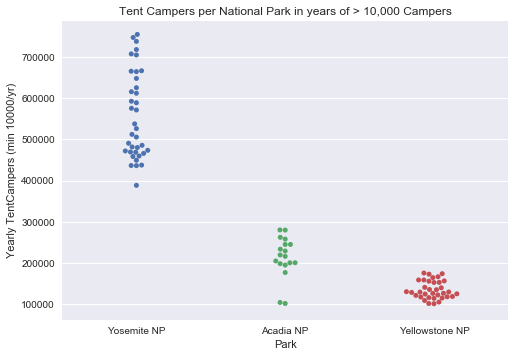

In [30]:
# First we will see how this looks in a swarm plot

sns.swarmplot(x='Park', y='TentCampers', data = triple_camping_data)

# Of Course we need labels
_ = plt.xlabel('Park')
_ = plt.ylabel('Yearly TentCampers (min 10000/yr)') 
_ = plt.title('Tent Campers per National Park in years of > 10,000 Campers')

# Note there is a lot of excluded data which would change the plot pretty dramatically 

# Show it
plt.show()

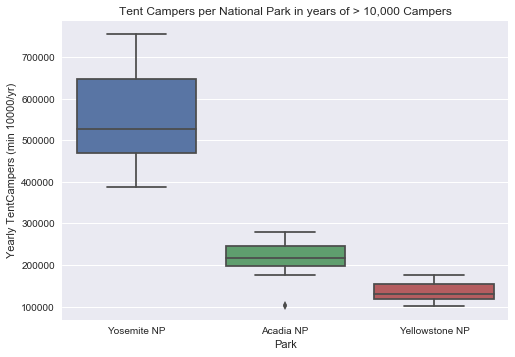

In [31]:
# Now on to the boxplot

_ = sns.boxplot(x='Park', y='TentCampers', data=triple_camping_data)

# Of Course we need labels
_ = plt.xlabel('Park')
_ = plt.ylabel('Yearly TentCampers (min 10000/yr)') 
_ = plt.title('Tent Campers per National Park in years of > 10,000 Campers')

# Note there is a lot of excluded data which would change the plot pretty dramatically 

# Show it
plt.show()

# Variance and Std Deviation

## Variance is squared average distance from the mean
## Std Deviation is root of variance

In [32]:
# Variance
print(np.var(yosemite_campers))

# Standard deviation
print(np.std(yosemite_campers))

TentCampers    1.090151e+10
dtype: float64
TentCampers    104410.297907
dtype: float64


# Covariance and Pearson Coefficient

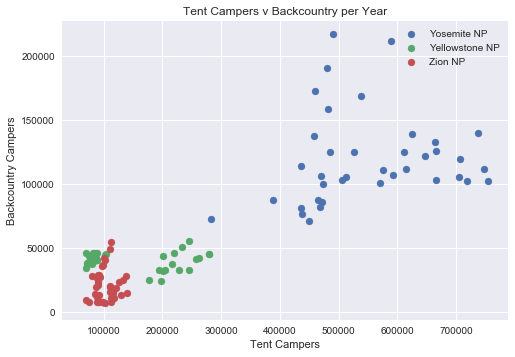

In [33]:
# Lets review the data w/ scatterplots
# We can also look at how Backcountry and TentCamping are related
# Since Acadia did not have backcountry camping until recently, we will use Zion NP instead

yosemite_tent_back = park_data.loc['Yosemite NP'][['TentCampers', 'Backcountry']][park_data.loc['Yosemite NP']['TentCampers'] > 1000]
yellowstone_tent_back = park_data.loc['Yellowstone NP'][['TentCampers', 'Backcountry']][park_data.loc['Yellowstone NP']['TentCampers'] > 1000]
zion_tent_back = park_data.loc['Zion NP'][['TentCampers', 'Backcountry']][park_data.loc['Zion NP']['TentCampers'] > 1000]


_ = plt.scatter(yosemite_tent_back.TentCampers, yosemite_tent_back.Backcountry)
_ = plt.scatter(yellowstone_tent_back.TentCampers, yellowstone_tent_back.Backcountry)
_ = plt.scatter(zion_tent_back.TentCampers, zion_tent_back.Backcountry)
_ = plt.legend(['Yosemite NP', 'Yellowstone NP', 'Zion NP'])

_ = plt.xlabel('Tent Campers')
_ = plt.ylabel('Backcountry Campers')
_ = plt.title('Tent Campers v Backcountry per Year')
plt.show()



# Covariance: how two statistics vary together

### Mean of the product of the differences (((x1 - xmean) * (y1 - ymean))/2)   [assuming 2 dimensions and 1 points]

# Pearson Correlation  Coefficient (ρ): unitless
## covariance/((std of x) * (std of y))
### variability due to codependance / independant variability 

#### 0 = No correlation, 1 = highly correlated

In [34]:
# Covariance, np.cov()
# Matrix that is spit out shows [[cov(x), cov(x,y)], [cov(y,x), cov(y)] # cov(x,y) == cov(y,x)
np.cov(yosemite_tent_back.TentCampers, yosemite_tent_back.Backcountry)

array([[  1.28967105e+10,   5.84281796e+08],
       [  5.84281796e+08,   1.25627696e+09]])

In [35]:
# Pearson Coeff function
def pearson(x,y):
    #use np.corrcoef as it calculates 
    cor_matrix = np.corrcoef(x,y)
    return round(float(cor_matrix[1,0]),3)

In [36]:
# Calculate Pearson coefficients for each
yosemite_tb_pearson = round(float(pearson(yosemite_tent_back.TentCampers, yosemite_tent_back.Backcountry)),3)
yellowstone_tb_pearson = round(float(pearson(yellowstone_tent_back.TentCampers, yellowstone_tent_back.Backcountry)),3)
zion_tb_pearson = round(float(pearson(zion_tent_back.TentCampers, zion_tent_back.Backcountry)),3)



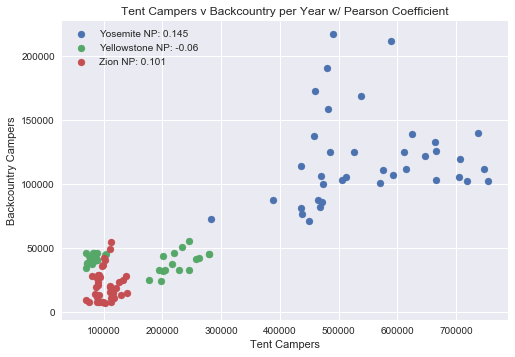

In [37]:
# Redo the graph w/ Pearson coefficients added:

_ = plt.scatter(yosemite_tent_back.TentCampers, yosemite_tent_back.Backcountry)
_ = plt.scatter(yellowstone_tent_back.TentCampers, yellowstone_tent_back.Backcountry)
_ = plt.scatter(zion_tent_back.TentCampers, zion_tent_back.Backcountry)
_ = plt.legend(['Yosemite NP: {}'.format(yosemite_tb_pearson) , 'Yellowstone NP: {}'.format(yellowstone_tb_pearson),'Zion NP: {}'.format(zion_tb_pearson)])

_ = plt.xlabel('Tent Campers')
_ = plt.ylabel('Backcountry Campers')
_ = plt.title('Tent Campers v Backcountry per Year w/ Pearson Coefficient')
plt.show()

In [38]:
# Create df based off summed yearly statistics
park_data_year_sums = park_data.reset_index().groupby('Year').sum()


In [39]:
# Looking at pearson coefficients between variables
def pearson_matrix(var1,var2,data=park_data_year_sums, plot=False, threshold=1000):
    '''Create a pearson_matrix based off two categories'''
    # Establish the df
    df = data[(data[var1] > threshold) & (data[var2] > threshold)]

    # Pearson score
    graph_p = pearson(df[var1],df[var2])
    
    # Plotting the graph
    if plot == True:
        
        _ = plt.scatter(df[var1], df[var2])#, c=df['Decade'])
        _ = plt.xlabel(var1)
        _ = plt.ylabel(var2)
        _ = plt.legend(["Pearson coeff: {}".format(graph_p)])
        _ = plt.title('Total NPS Property {0} v {1} & Pearson Coeff'.format(var1,var2))
        
        plt.show()
    
    return graph_p

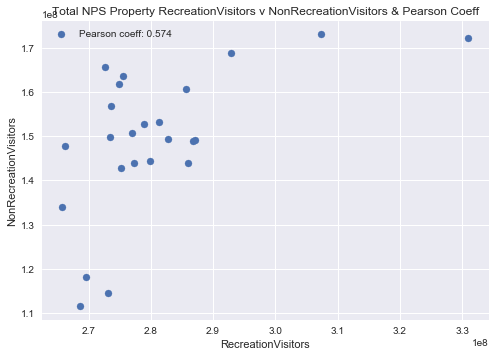

0.574

In [40]:
pearson_matrix('RecreationVisitors', 'NonRecreationVisitors', threshold=100000000, plot=True)

In [41]:
# Getting data columns

park_data_columns = []
[park_data_columns.append(col) for col in park_data.columns]

[None, None, None, None, None, None, None, None, None, None, None]

In [42]:
# Establishing Pearson Coefficients between all columns using Pandas .corr()
# Cutting data only from 1979 onwards as most of the data is incomplete beforehand
park_data_year_sums.loc[1979:].corr()


,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,NonRecreationOvernightStays,MiscellaneousOvernightStays
RecreationVisitors,1.000000,0.640322,0.638025,0.644568,0.153589,0.613289,-0.206640,-0.644587,-0.423456,-0.632938,0.469009
NonRecreationVisitors,0.640322,1.000000,-0.114372,0.989012,-0.321036,0.904949,-0.697125,-0.944937,-0.243655,-0.591617,-0.042524
RecreationHours,0.638025,-0.114372,1.000000,-0.104735,0.657612,-0.124741,0.512919,0.082579,-0.124161,-0.122219,0.699846
NonRecreationHours,0.644568,0.989012,-0.104735,1.000000,-0.262193,0.898613,-0.674991,-0.951605,-0.251171,-0.545879,0.029440
ConcessionerLodging,0.153589,-0.321036,0.657612,-0.262193,1.000000,-0.363518,0.531848,0.184752,-0.061291,0.333836,0.814105
ConcessionerCamping,0.613289,0.904949,-0.124741,0.898613,-0.363518,1.000000,-0.703736,-0.891024,-0.383993,-0.686929,-0.049153
TentCampers,-0.206640,-0.697125,0.512919,-0.674991,0.531848,-0.703736,1.000000,0.756623,0.496440,0.550761,0.267632
RVCampers,-0.644587,-0.944937,0.082579,-0.951605,0.184752,-0.891024,0.756623,1.000000,0.436168,0.633787,-0.140818
Backcountry,-0.423456,-0.243655,-0.124161,-0.251171,-0.061291,-0.383993,0.496440,0.436168,1.000000,0.553425,-0.315709
NonRecreationOvernightStays,-0.632938,-0.591617,-0.122219,-0.545879,0.333836,-0.686929,0.550761,0.633787,0.553425,1.000000,0.010319


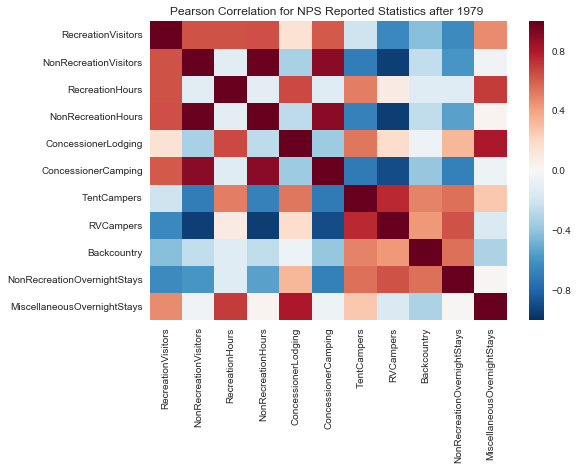

In [43]:
# Plotting the Heatmap using sns.heatmap

sns.heatmap(park_data_year_sums.loc[1979:].corr())
plt.title('Pearson Correlation for NPS Reported Statistics after 1979 ')
plt.show()

In [44]:
# Making a list of Pearson Coeff where abs(value) is greater than 0.65

#Making a temp dataframe where correlation > 0.8 and less than 1.0 to avoid comparing to self
_ = ((abs(park_data_year_sums.loc[1979:].corr()) > 0.8) & (abs(park_data_year_sums.loc[1979:].corr()) < 1.0))

#Making the list
corr_list = []

# iterating through columns
for i in _.columns:
    # iterating through index
    for x in _[i].index:
        if _[i].loc[x] == True:
            # Avoiding duplicates of a,b and b,a
            if (x,i) in corr_list:
                pass
            else:
                corr_list.append((i,x))

In [45]:
# Showing the list

corr_list

[('NonRecreationVisitors', 'NonRecreationHours'),
 ('NonRecreationVisitors', 'ConcessionerCamping'),
 ('NonRecreationVisitors', 'RVCampers'),
 ('NonRecreationHours', 'ConcessionerCamping'),
 ('NonRecreationHours', 'RVCampers'),
 ('ConcessionerLodging', 'MiscellaneousOvernightStays'),
 ('ConcessionerCamping', 'RVCampers')]

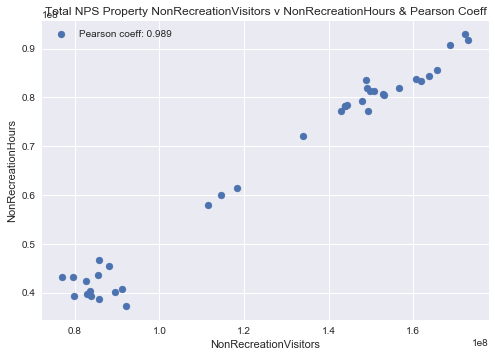

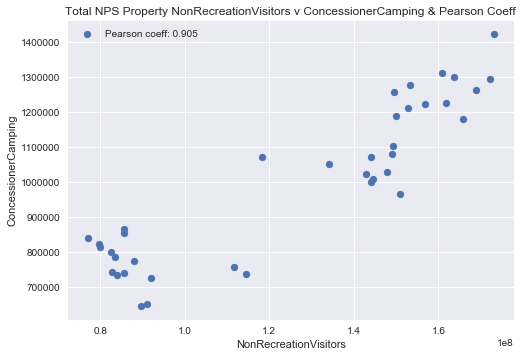

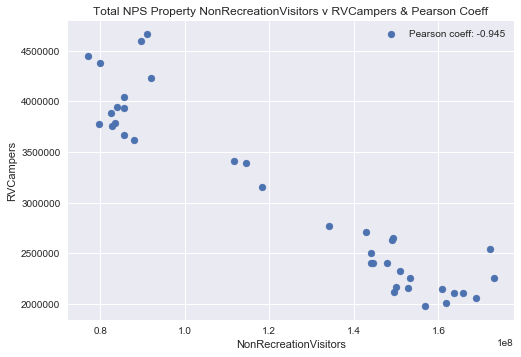

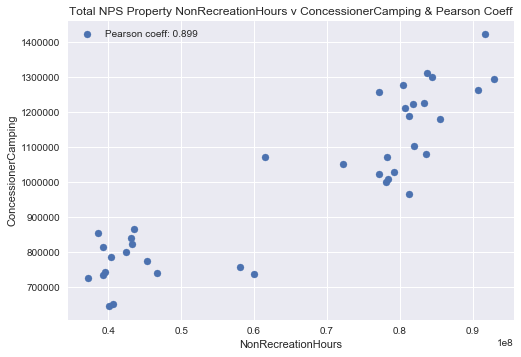

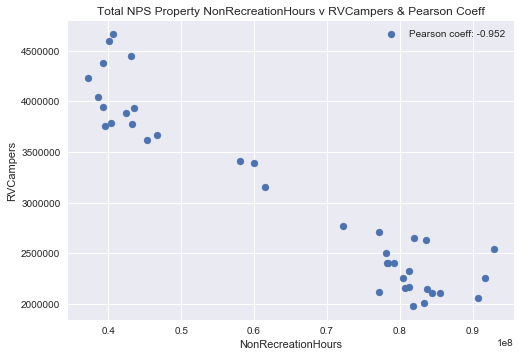

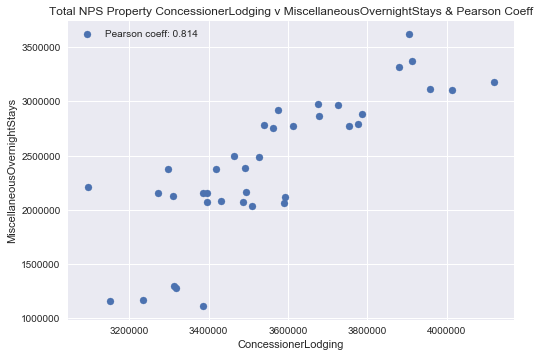

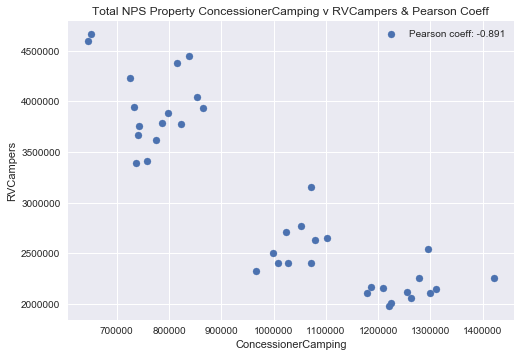

In [46]:
# Graphing using the function
for entry in corr_list:
    pearson_matrix(entry[0], entry[1], plot=True)

In [47]:
park_data_year_sums_79 = park_data_year_sums.loc[1979:]

In [48]:
def decade(year):
    '''Returns decade from year'''
    if year < 1990:
        return 0
    elif year < 2000:
        return 1
    elif year < 2010:
        return 2
    elif year < 2020:
        return 3

In [49]:
park_data_year_sums_79['Decade'] = 0
park_data_year_sums_79['Decade'] = park_data_year_sums_79.reset_index()['Year'].apply(decade)

/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
park_data_year_sums_79

,RecreationVisitors,NonRecreationVisitors,RecreationHours,NonRecreationHours,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,NonRecreationOvernightStays,MiscellaneousOvernightStays,Decade
Year,,,,,,,,,,,,
1979,205369795,77065306,1027515046,43110345,3151721,838932,3424681,4446370,2397098,564969,1155140,NaN
1980,220463211,79860871,1094294242,39292243,3235039,814734,3934114,4378491,2395236,575499,1162303,NaN
1981,238592669,91070631,1203108427,40668286,3386345,650088,4221920,4663020,2329845,628185,1108470,NaN
1982,244924579,89523436,1229715915,40035428,3312100,644543,4153999,4596036,2424227,450272,1291622,NaN
1983,243619396,92026935,1240144791,37196465,3317010,725979,3601198,4232793,2579716,367532,1278885,NaN
1984,248785509,83885774,1265512799,39306318,3486041,733121,3747293,3943183,1978867,362281,2074650,NaN
1985,263441808,82748302,1303592955,39607247,3527045,743256,3586062,3759294,1680414,334846,2484095,NaN
1986,281094850,83456649,1347726787,40330483,3538176,786102,3460005,3788528,1644691,312942,2779461,NaN
1987,287244998,85706136,1393887560,38572366,3726504,852820,3955795,4043206,1574706,313493,2969801,NaN


In [51]:
Decade = park_data_year_sums_79.reset_index()['Year'].apply(decade)
Decade = [int(num) for num in Decade]
park_data_year_sums_79['Decade'] = Decade

/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
# Looking at pearson coefficients between variables

def pearson_matrix_test(var1,var2,data=park_data_year_sums_79, plot=True, threshold=1000):
    '''Create a pearson_matrix based off two categories'''
    # Establish the df
    df = data

    # Pearson score
    graph_p = pearson(df[var1],df[var2])
    
    # Plotting the graph
    if plot == True:
        _ = plt.scatter(df[var1], df[var2],c=df['Decade'])
        _ = plt.xlabel(var1)
        _ = plt.ylabel(var2)
        _ = plt.legend([graph_p])
        _ = plt.title('Total NPS Property {0} v {1} & Pearson Coeff'.format(var1,var2))
        
        plt.show()
    
    return graph_p

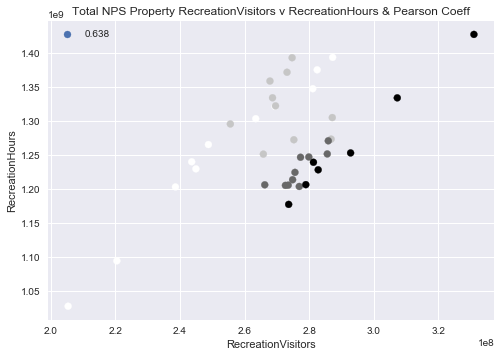

0.638

In [53]:
plt.clf()
pearson_matrix_test('RecreationVisitors', 'RecreationHours')

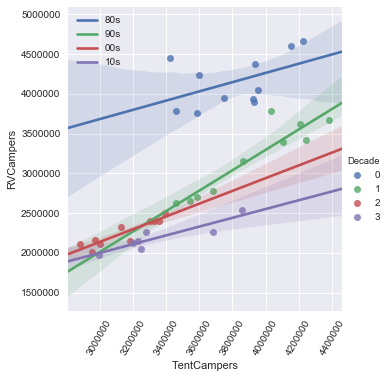

In [54]:
plt.clf()
sns.lmplot(x = 'TentCampers', y= 'RVCampers', data=park_data_year_sums_79, hue='Decade')
plt.xticks(rotation='60')
plt.legend(['80s','90s','00s', '10s'])
plt.show()


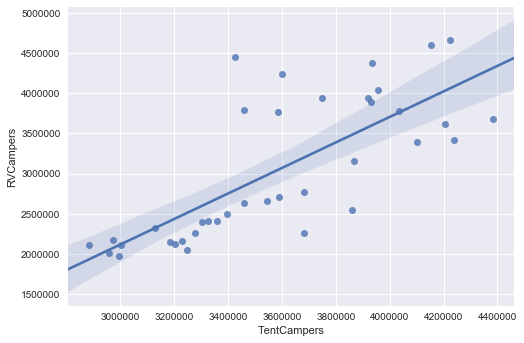

In [55]:
sns.regplot(x='TentCampers', y='RVCampers', data=park_data_year_sums_79)
plt.show()

In [60]:
help(sns.lmplot)

Help on function lmplot in module seaborn.linearmodels:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, size=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``col`` and ``row``. Ho

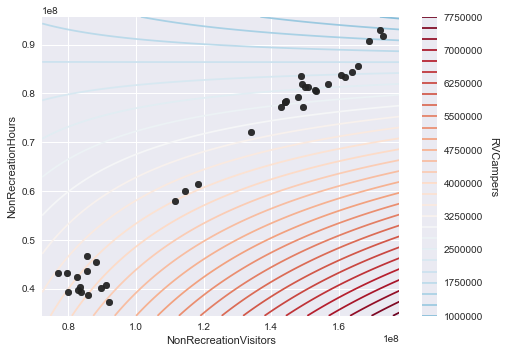

In [57]:
plt.clf()
sns.interactplot(x1='NonRecreationVisitors', x2='NonRecreationHours', y='RVCampers',data=park_data_year_sums_79)
plt.show()

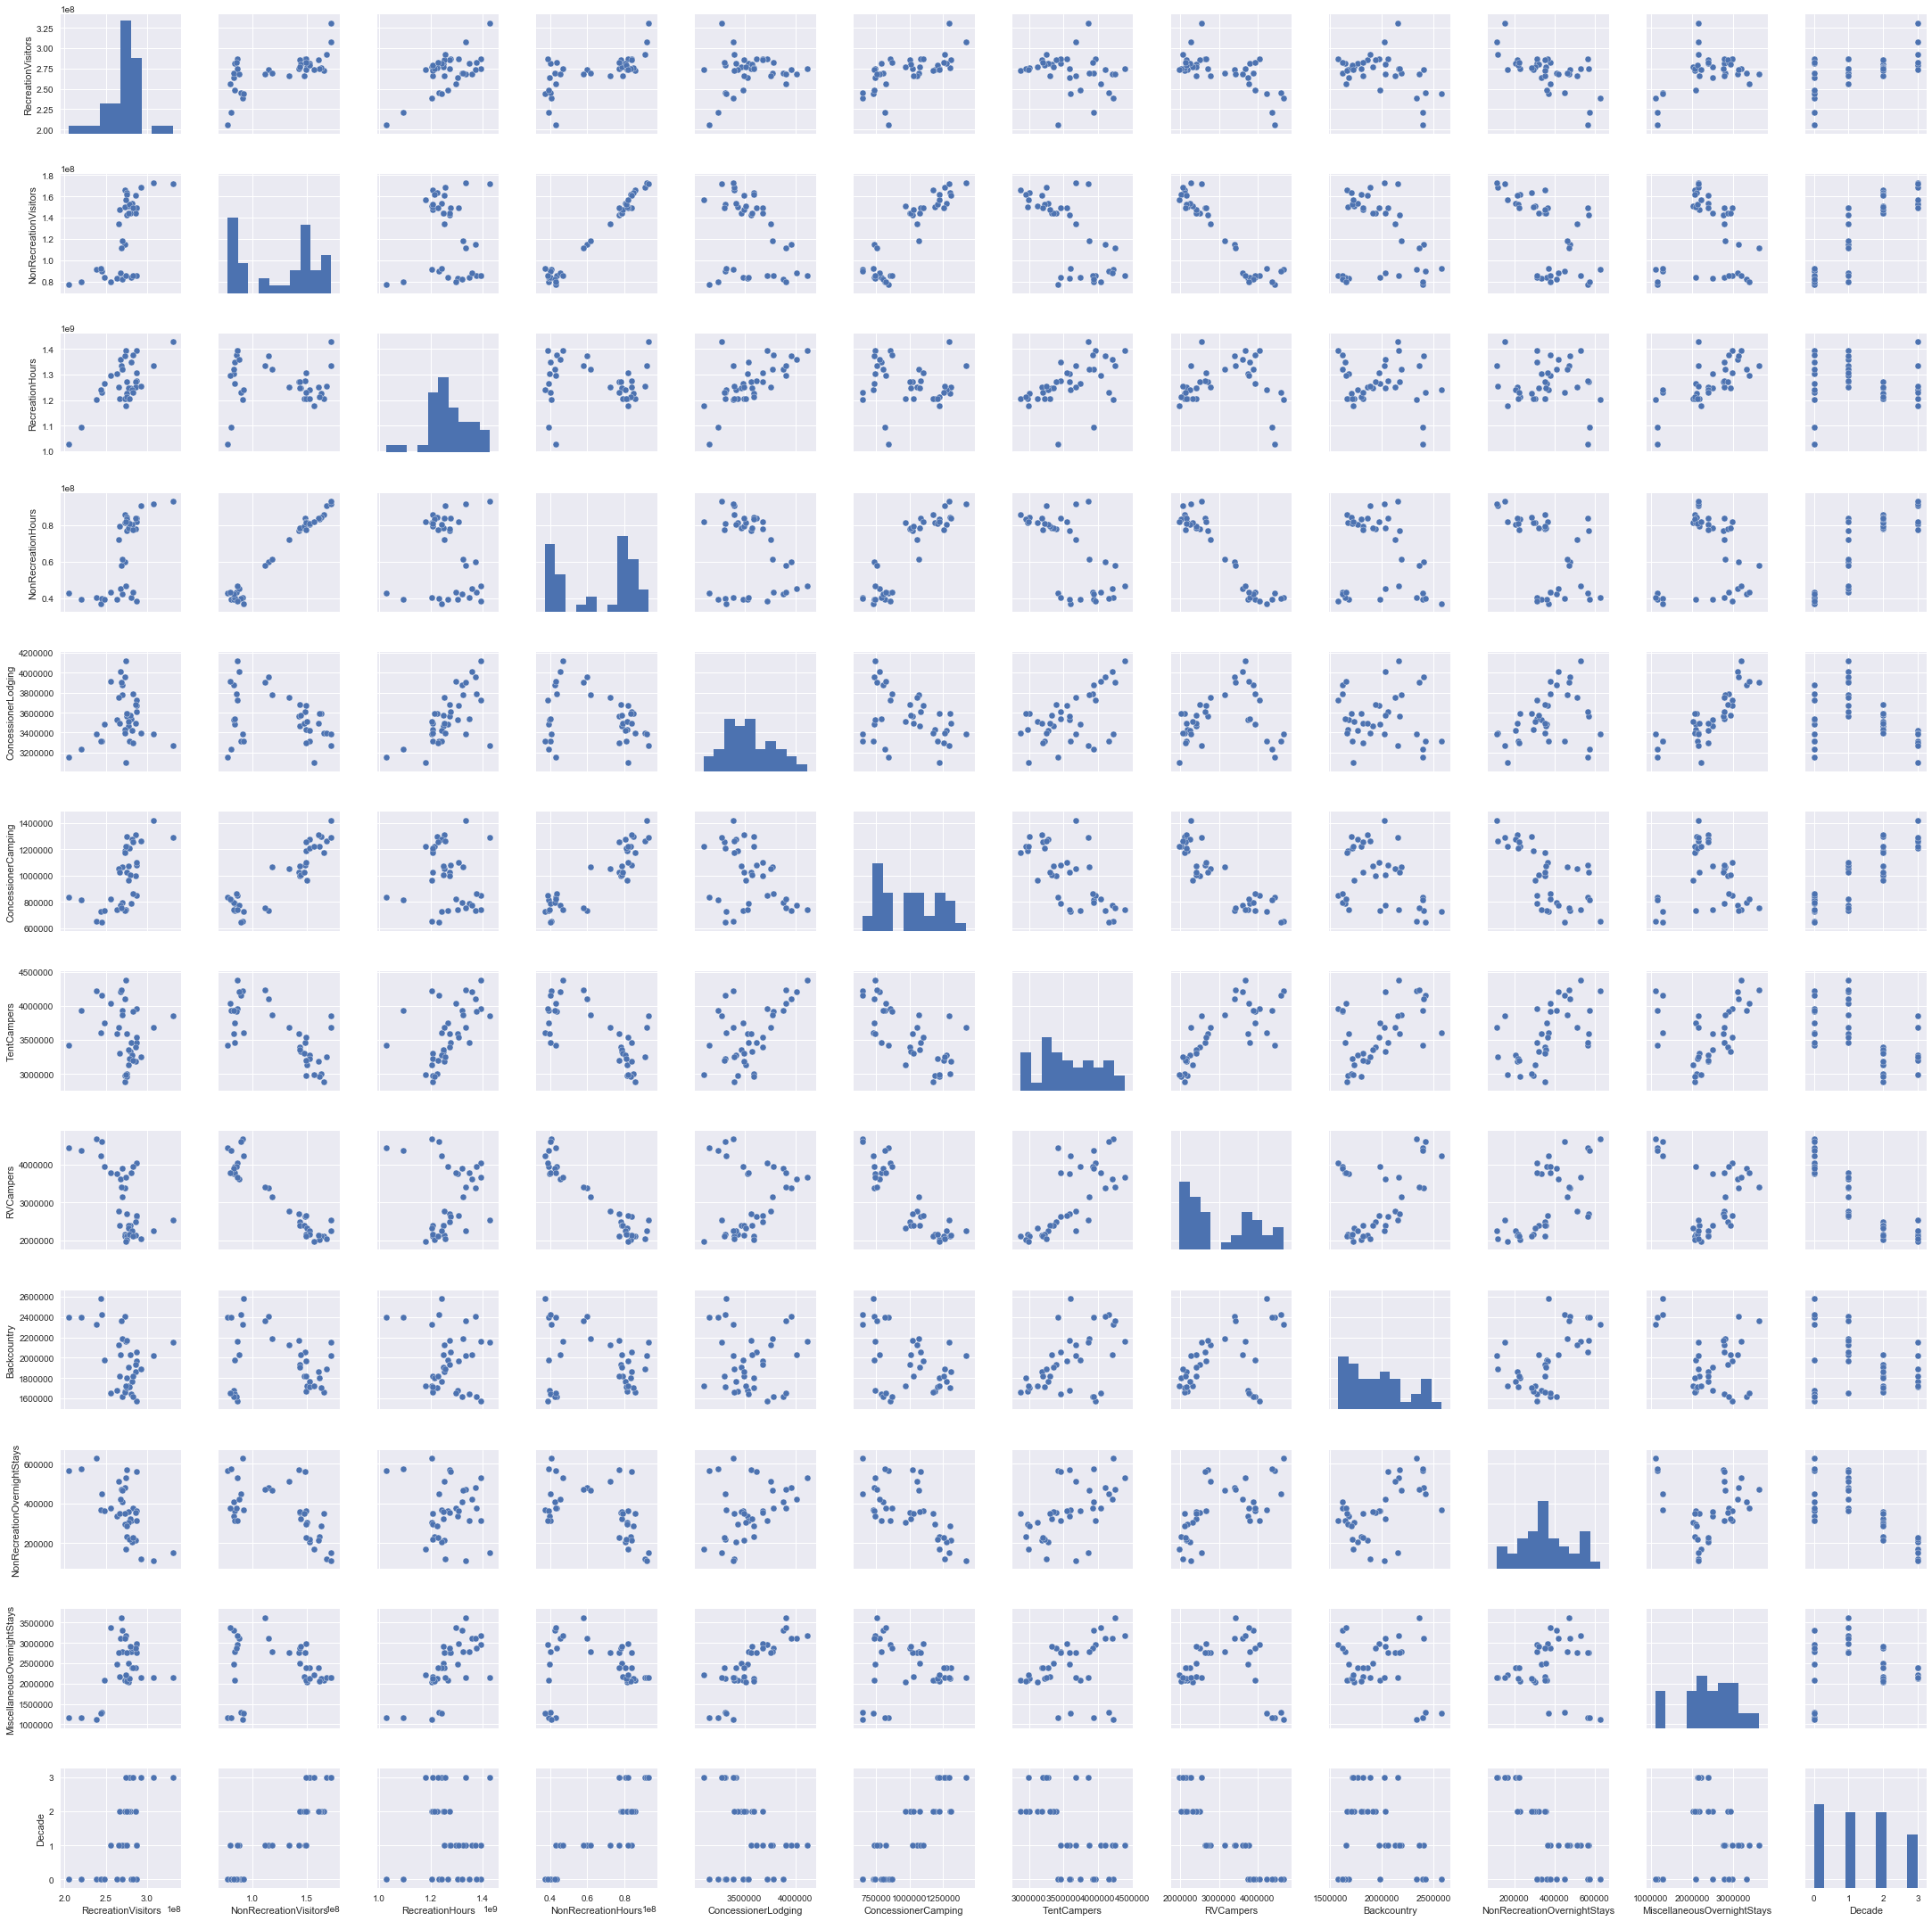

In [58]:
sns.pairplot(park_data_year_sums_79)
plt.show()

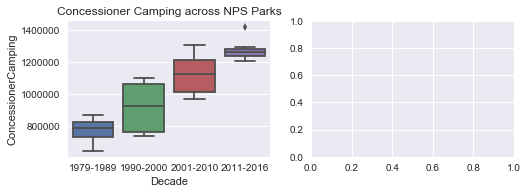

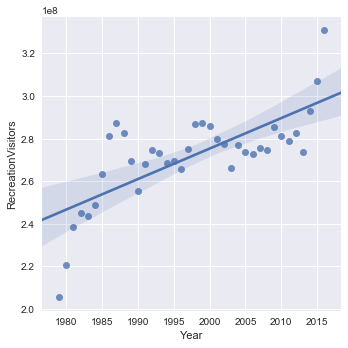

In [59]:
# why is that there??

plt.clf()
plt.subplot(2,2,1)
_ = sns.boxplot(x='Decade', y='ConcessionerCamping', data=park_data_year_sums_79)
_ = plt.xticks(np.arange(4),('1979-1989', '1990-2000', '2001-2010', '2011-2016'))
_ = plt.title('Concessioner Camping across NPS Parks')

plt.subplot(2,2,2)
_ = sns.lmplot(y='RecreationVisitors', x='Year', data=park_data_year_sums_79.reset_index())

plt.show()